<a href="https://colab.research.google.com/github/Kate5-7-2021/Kate_INFO5731_Spring2021/blob/main/Copy_of_In_Class_exercises_10_Second_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import string
import nltk
import gensim
from scipy.cluster import hierarchy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from textblob import TextBlob
from nltk import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
csvfile = open('/content/Amazon_Unlocked_Mobile.csv', 'r').readlines()           #Code to split data to use 20% of the data
filename = 1
for i in range(len(csvfile)):
     if i % 40000 == 0:
         open(str(filename) + '.csv', 'w+').writelines(csvfile[i:i+40000])
         filename += 1

In [11]:
df_split=pd.read_csv("/content/1.csv")
print(df_split.shape)

(39991, 6)


In [13]:
df=df_split.head(5000)
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
4995,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,5,This review is not for the product as you may ...,64.0
4996,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,4,The product was in good structure. I'm still n...,0.0
4997,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,1,The iPhone was fine. It works and is in good c...,157.0
4998,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,2,Screen cracked really quick.,0.0


##**Remove Null Values**

In [16]:
df= df.dropna()                  #there are some null values to be removed
print(df.shape)                  # For this assignment I follow the reference code to practice the model with my dataset.

(3422, 6)


##**Visualize Rating**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


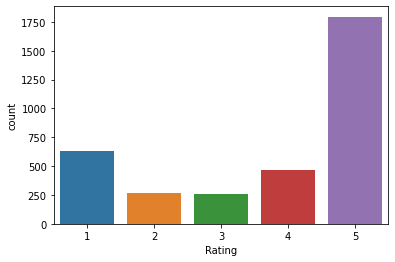

In [17]:
sns.countplot(df.Rating)

##**Convert numerical rate to categorical rate**

In [18]:
def classification(rating):
  if rating<3:
    return 'negative'
  return 'positive'

pos_neg_rating=df['Rating'].map(classification)
df['pos_neg_Rating']=pos_neg_rating
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,pos_neg_Rating
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,positive
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,positive


In [19]:
df['pos_neg_Rating'].value_counts()

positive    2522
negative     900
Name: pos_neg_Rating, dtype: int64

##**Data Cleaning**

In [21]:
#df.drop_duplicates()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


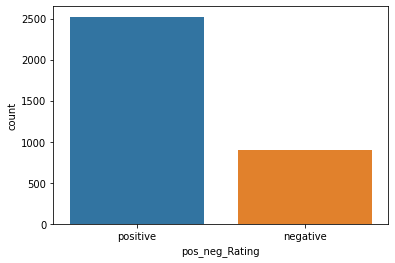

In [22]:
sns.countplot(df.pos_neg_Rating)

###**Text Processing**

In [23]:
#Find sentences with HTML tags

#import re        required library
i=0;
for sent in df['Reviews'].values:
  if (len(re.findall('<.*?>', sent))):
    print(i)
    print(sent)
    break;
  i += 1;

3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [26]:
sno=nltk.stem.SnowballStemmer('english')    
stop=set(stopwords.words('english'))

In [27]:
#import nltk                                   required library
#from nltk.corpus import stopwords

#clean all html tags
def cleanhtml(sentence):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr,' ', sentence)
  return cleantext

#df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(lambda x: cleanhtml(x))

In [29]:
#clean all punctuations or special characters
def cleanpunc(sentence):
  cleanp = re.sub(r'[?|i|\'|#]',r'',sentence)
  clean_df = re.sub(r'[.|,|)|(|\|/]',r'',cleanp)
  return clean_df
print(stop)
print('************************************************************************') 
print(sno.stem('tasty'))

{'a', "she's", 'isn', 're', 'below', "isn't", 'mightn', 'weren', 'yours', "shan't", 'his', 'ma', 'before', 'from', 'but', 'or', 'she', 'here', 'there', 'does', 'only', 'not', 'are', 'he', 'himself', 'itself', 'd', "wasn't", 'herself', 't', "you'd", 'shan', 'ain', "mustn't", 'these', 'ours', 'just', 'on', 'those', 'own', 'for', 'll', 'my', 'while', 'when', "hasn't", 'no', 'her', "that'll", 'why', "hadn't", 'was', 'y', "won't", 'will', 'same', 'too', 'because', 'can', 'should', 've', 'if', 'where', 'couldn', 'me', "it's", 'won', 'whom', 'have', 'about', 'any', 'during', 'in', "mightn't", 'further', 'nor', 'this', 'themselves', 'be', 'both', 'few', "don't", "you'll", 'each', "should've", 'needn', 'most', 'that', 'with', 'an', 'more', 'of', 'doing', 'now', 'ourselves', 'doesn', "haven't", 'up', 'had', 'myself', "doesn't", 'as', 'do', 'didn', 'very', 'its', 'against', 'hasn', 'then', 'yourselves', "you're", 'them', 's', 'once', 'our', 'above', 'aren', "weren't", 'through', 'than', 'by', 'is

In [30]:
#cleaning
#remove punctuation
#df['Cleaned Reviews']=df['Reviews'].str.replace('[^\w\s]','')
#remove special characters
#df['Cleaned Reviews']=df['Cleaned Reviews'].str.replace(r"[^a-zA-Z0-9]", ' ') 
#remove stop words
#stop=stopwords.words('english')
#df['Cleaned Reviews']=df['Cleaned Reviews'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
#lowercase
#df['Cleaned Reviews']=df['Cleaned Reviews'].str.lower()
#stemming
#st=PorterStemmer()
#df['Cleaned Reviews']=df['Cleaned Reviews'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))
#Tokenization
#df['Cleaned Reviews']=df['Cleaned Reviews'].apply(lambda x:TextBlob(x).words)
#lemmatization
#df['Cleaned Reviews']=df['Cleaned Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))
#print clean dataframe
#df

In [35]:
i=0
str1=' '
df_string=[]
all_positive_words=[]
all_negative_words=[]
s=''
for sent in df['Reviews'].values:
  filtered_sentence=[]
  sent=cleanhtml(sent)
  for w in sent.split():
    for clean_df_words in cleanpunc(w).split():
      if((clean_df_words.isalpha()) & (len(clean_df_words)>2)):
        if (clean_df_words.lower() not in stop):
          s=(sno.stem(clean_df_words.lower())).encode('utf8')
          filtered_sentence.append(s)
          if (df['pos_neg_Rating'].values)[i]=='positive':
            all_positive_words.append(s)
          if (df['pos_neg_Rating'].values)[i]=='negative':
            all_negative_words.append(s)
        else:
          continue
      else:
        continue
  str1 = b" ".join(filtered_sentence)
  df_string.append(str1)
  i+=1


In [37]:
df['Cleaned Reviews']=df_string
df['Cleaned Reviews']=df['Cleaned Reviews'].str.decode("utf-8")

In [38]:
df.shape

(3422, 8)

##**K means Clustering**

In [39]:
count_vect = CountVectorizer()                   #using bag of words
bow = count_vect.fit_transform(df['Cleaned Reviews'].values)
bow.shape

(3422, 6876)

In [41]:
bow

<3422x6876 sparse matrix of type '<class 'numpy.int64'>'
	with 86018 stored elements in Compressed Sparse Row format>

In [42]:
#the kind of words generated as columns by bow
column_word= count_vect.get_feature_names()
# check first 20 columns generated by bow
column_word[1:20]

['abett',
 'abl',
 'ablti',
 'abnorm',
 'absolut',
 'absorbng',
 'absurd',
 'abund',
 'abus',
 'abut',
 'abysm',
 'abysmaltap',
 'acatel',
 'accdent',
 'accent',
 'accept',
 'acceptng',
 'accesor',
 'access']

In [43]:
#using k-means++ 
model = KMeans(n_clusters = 10,init='k-means++', n_jobs = -1,random_state=99)
model.fit(bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [ ]:
#kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', 
                #verbose=0, random_state=99, copy_x=True, n_jobs=-1, algorithm='auto')
#kmeans.fit(bow)

In [44]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [45]:
cluster_center

array([[0.00684932, 0.        , 0.23287671, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01075269, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00124844, 0.04244694, ..., 0.00124844, 0.        ,
        0.        ],
       [0.        , 0.        , 0.7037037 , ..., 0.        , 0.        ,
        0.07407407],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [46]:
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')

In [47]:
silhouette_score

0.21178700336553022

In [49]:
df = df
df['Bow Clus Label'] = model.labels_
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,pos_neg_Rating,Cleaned Reviews,Bow Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,positive,feel lucki found ths use phone use hard phone ...,7
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,positive,nce phone nce grade pantach revu clean set eas...,7
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,positive,pleas,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,positive,work good goe slow sometm good phone love,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,positive,great phone replac lost phone thng volum butto...,7


In [51]:
df.groupby(['Bow Clus Label'])['Reviews'].count()

Bow Clus Label
0     146
1    2139
2       3
3       2
4       2
5       1
6     288
7     801
8      27
9      13
Name: Reviews, dtype: int64

In [52]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 ths
 wth
 use
 good
 screen
 lke
 one
 work
 great
Cluster 1: phone
 great
 work
 good
 wth
 ths
 love
 use
 screen
 prce
Cluster 2: phone
 ths
 lke
 wth
 use
 camera
 dont
 app
 smartphon
 batteri
Cluster 3: phone
 wth
 ths
 qualti
 one
 camera
 lke
 good
 featur
 use
Cluster 4: phone
 use
 ths
 wth
 card
 featur
 app
 screen
 sim
 carrer
Cluster 5: phone
 wth
 tracfon
 use
 data
 call
 ths
 tme
 androd
 work
Cluster 6: phone
 ths
 wth
 screen
 great
 use
 good
 one
 lke
 camera
Cluster 7: phone
 ths
 wth
 work
 screen
 great
 good
 use
 one
 would
Cluster 8: phone
 wth
 ths
 get
 app
 screen
 whch
 one
 good
 use
Cluster 9: phone
 ths
 wth
 screen
 lke
 one
 camera
 good
 get
 would


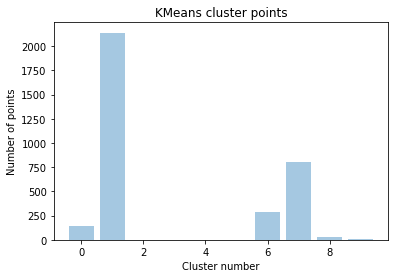

In [53]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

##**K means using TFIDF**

In [54]:
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df['Cleaned Reviews'].values)
tfidf.shape

(3422, 6876)

In [55]:
model_tf = KMeans(n_clusters = 10, n_jobs = -1,random_state=99)
model_tf.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [56]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[0.00013866, 0.        , 0.01138563, ..., 0.        , 0.0001825 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00357858, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01132709, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [57]:
terms1 = tfidf_vect.get_feature_names()
terms1[1:15]

['abett',
 'abl',
 'ablti',
 'abnorm',
 'absolut',
 'absorbng',
 'absurd',
 'abund',
 'abus',
 'abut',
 'abysm',
 'abysmaltap',
 'acatel',
 'accdent']

In [58]:
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [59]:
silhouette_score_tf

0.039848368296235344

In [60]:
df = df
df['Tfidf Clus Label'] = model_tf.labels_
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,pos_neg_Rating,Cleaned Reviews,Bow Clus Label,Tfidf Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,positive,feel lucki found ths use phone use hard phone ...,7,6
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,positive,nce phone nce grade pantach revu clean set eas...,7,8
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,positive,pleas,1,5
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,positive,work good goe slow sometm good phone love,1,2
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,positive,great phone replac lost phone thng volum butto...,7,0


In [61]:
df.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0     699
1      99
2     316
3     100
4      95
5    1110
6     745
7      63
8      97
9      98
Name: Reviews, dtype: int64

In [62]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 wth
 ths
 new
 got
 one
 purchas
 came
 problem
 would
Cluster 1: love
 phone
 daughter
 ths
 great
 bought
 thank
 work
 prob
 far
Cluster 2: work
 phone
 great
 ddnt
 fne
 well
 wth
 verzon
 doesnt
 good
Cluster 3: good
 phone
 condton
 unlock
 qualti
 prce
 fantastc
 work
 product
 cell
Cluster 4: excel
 condton
 product
 phone
 prce
 recommend
 arrv
 good
 new
 love
Cluster 5: phone
 good
 great
 product
 expect
 screen
 thank
 lke
 prce
 ths
Cluster 6: phone
 ths
 wth
 screen
 good
 use
 great
 camera
 prce
 one
Cluster 7: perfect
 work
 phone
 great
 new
 unlock
 everythng
 wth
 thank
 fast
Cluster 8: nce
 phone
 prce
 fast
 love
 great
 shppng
 wth
 good
 featur
Cluster 9: great
 phone
 work
 prce
 product
 gong
 cours
 exact
 headphon
 ssue


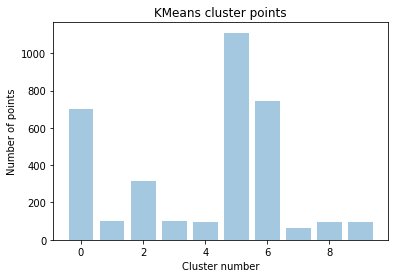

In [63]:
plt.bar([x for x in range(10)], df.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [64]:
#for i in range(10):
    #print("2 review of assigned to cluster ", i)
    #print("-" * 70)
    #print(df.iloc[df.groupby(['Tfidf Clus Label']).groups[i][5]]['Reviews'])
    #print('\n')
    #print(df.iloc[df.groupby(['Tfidf Clus Label']).groups[i][10]]['Reviews'])
    #print('\n')
    #print(df.iloc[df.groupby(['Tfidf Clus Label']).groups[i][20]]['Reviews'])
    #print('\n')
    #print("_" * 70)

##**Average Word to Vector**

In [ ]:
#i=0
#list_of_sent=[]
#for sent in df['Cleaned Reviews'].values:
    #list_of_sent.append(sent.split())

In [ ]:
#print(df['Cleaned Reviews'].values[0])
#print("*****************************************************************")
#print(list_of_sent[0])

In [67]:
i=0
list_of_sent_train=[]
for sent in df['Cleaned Reviews'].values:
    list_of_sent_train.append(sent.split())

In [68]:
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)

In [69]:
sent_vectors = [];
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100)
    cnt_words =0;
    for word in sent:
      try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
      except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


(3422, 100)

In [71]:
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

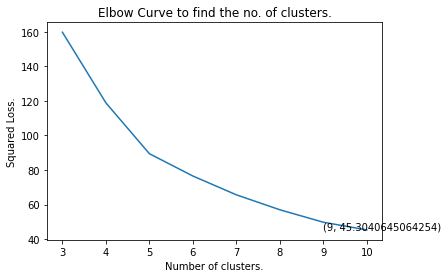

In [72]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors)      # Train Cluster
    squared_errors.append(kmeans.inertia_)                       # Appending the squared loss obtained in the list
optimal_clusters = np.argmin(squared_errors) + 2                 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()



In [73]:
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  45.3040645064254


In [74]:
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [75]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [76]:
word_cluster_center[1:2]

array([[-5.58993802e-03,  1.44066707e-03,  6.26814034e-03,
        -2.91713323e-03, -1.22631720e-03,  2.19456443e-04,
        -1.50912623e-03, -4.04064648e-03, -3.95916484e-03,
         2.77081470e-03, -5.74674646e-03, -5.85819538e-04,
        -1.75645274e-03,  7.57222202e-04,  9.92969768e-04,
         9.26430987e-04, -4.26255404e-03,  2.97752285e-03,
         2.78636035e-03,  4.45943418e-04, -2.55245670e-03,
        -1.95020636e-03, -1.29368705e-03,  5.19561714e-03,
         1.33979017e-04,  5.77393259e-04,  3.00278705e-03,
        -5.28503746e-03,  1.43533695e-03, -1.87092164e-03,
        -1.36083998e-03,  1.85889022e-03,  2.94771733e-03,
        -4.24333495e-04, -1.76800574e-04, -2.51526542e-03,
        -7.96980583e-04,  1.91013497e-03,  1.99544499e-03,
         2.79075497e-03,  2.28309153e-03, -2.47862857e-04,
        -3.96598204e-03,  2.37926498e-04, -5.64648710e-03,
        -6.38028818e-04,  1.14320405e-04, -9.50043039e-04,
         3.82435224e-03, -7.45042626e-04,  1.54839406e-0

In [77]:
df = df
df['AVG-W2V Clus Label'] = model2.labels_
df.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0     254
1      91
2    1073
3     657
4     433
5     133
6      20
7     149
8     612
Name: Reviews, dtype: int64

In [78]:
for i in range(2):                       #to get reviews for all clusters use 'optimal_clusters insread of 
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(df.iloc[df.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
Phone good just a little slow phone old but it's a great phone temporary right now. thank you for the great deal


Perfect in every way.


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
excelente


excelente


______________________________________________________________________


##**DBSCAN Clustering**

In [79]:
minPts = 2 * 100                                       #200 nearest neighbour
def lower_bound(nums, target):                         # return the number just greater than or equal to the number in the array.
    l, r = 0, len(nums) - 1
    while l <= r:                                      #search for binary
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):            # Returns the distance 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )                 # compute distances.
        if(len(dists) == 200 and dists[199] > dist):  # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist))         # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] 

In [80]:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

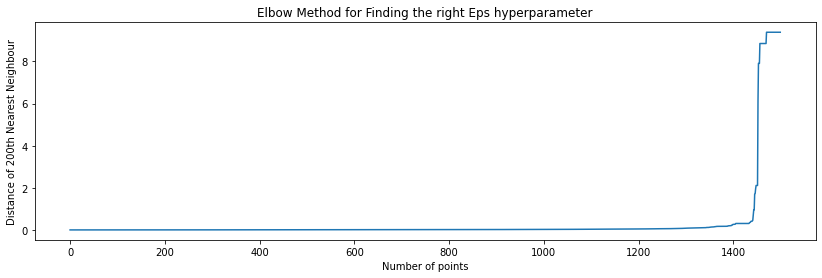

In [81]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [82]:
#based on the Elbow method the optimal value of the Eps seems to be 90
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [84]:
dfdb = df
dfdb['AVG-W2V Clus Label'] = model.labels_
dfdb.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    3422
Name: Reviews, dtype: int64

##**Hierarchial Clustering**

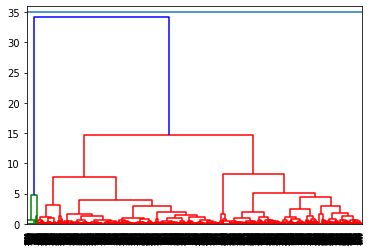

In [85]:

dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)           #5 clusters

In [87]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [88]:
aggdf = dfdb
aggdf['AVG-W2V Clus Label'] = cluster.labels_
aggdf.head(1)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,pos_neg_Rating,Cleaned Reviews,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,positive,feel lucki found ths use phone use hard phone ...,7,6,2


In [89]:
aggdf.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    1348
1     111
2    1592
3     107
4     264
Name: Reviews, dtype: int64

In [90]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdf.iloc[aggdf.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(aggdf.iloc[aggdf.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
It works good but it goes slow sometimes but its a very good phone I love it


Great phone to replace my lost phone. The only thing is the volume up button does not work, but I can still go into settings to adjust. Other than that, it does the job until I am eligible to upgrade my phone again.Thaanks!


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
excelente


excelente


______________________________________________________________________
2 reviews of assigned to cluster  2
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and d

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

###
K-means and DBSCAN both are unsupervised clustering. K-means clustering is the model for grouping the data based on the similarities and it is centroid-based machine learning algorithm. Euclidian Distance is used to measure the similarities in K-means model. Each cluster has one randomly centroid and the data which are close to each centroid are in that centroid cluster. DBSCAN it is the great way to detect outliers. DBSCAN clustering is density-based. There are two different categories of the points, core point and border point, which each data in dataset can be under one of these categories. Neighbor core point are in the same cluster and they are connected to one another. 
For K-means number of clusters must be specified, however for DBSCAN it is not necessary. Unlike K-means, DBSCAN can handle the outliers and can be used for high dimensional dataset. However, DBSCAN cannot be used for varying density data points.
For Hierarchical Clustering analyst should not specify number of the clusters, just can choose the cluster that has best format. In addition, it cannot handle big data well. The advantages of the Hierarchical clustering to K-means is in K-means data are selected randomly in each run for creating the clusters, so the results of running the algorithm several times might be different, but the results of Hierarchical clustering does not change by repeating the running time. For Hierarchical clustering analyst can interprets the dendrogram to choose clusters, while for K-means clustering number of K must be known at the initial point, and finally by trying different K, optimal K can be found. One of the best way to find the optimal K as shown in the program is using the Elbow method it does not matter if the Bag of word model is used or TFIDF. 
With Elbow method in K means we can figure out the optimal number of clusters which in this case it seems to be 5, after K means the Hierarchical clustering is the other method which shows the clusters but not as clear as K means. As mentioned above the DBscan is great to recognized outlier but not as beneficial as the other two methods to find the optimal clusters for the dataset.  
